In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate
import scipy.sparse as sp

In [2]:
#constants
hbar, m = 1, 1
k0, L = 20, 20
Nx = 2000 # number of x-values
dx = L / (Nx - 1)
print(1 / ( 2 *dx**2))
sigmax = 1
x0 = 5

#Find values 
dt = 0.0001
E = (hbar * k0) ** 2 / 2 / m
omega = E / hbar


def psi_I(x, t):
    return np.exp(-(x - x0)**2 / (2 * sigmax**2)) * np.sin(k0 * x - omega * t)
                  
def psi_R(x,t):
    return np.exp(-(x - x0)**2 / (2 * sigmax **2)) * np.cos(k0 * x - omega * t)

x = np.linspace(0, L, Nx)

#C_0 = np.trapz(psi_I(x, 0)**2 + psi_R(x, 0)**2, dx = dx)
C_dot = psi_I(x, 0) @ psi_I(x, 0) + psi_R(x, 0) @ psi_R(x, 0)
psi_R_init = psi_R(x, 0) / np.sqrt(C_dot)
#C_1_dot = psi_I(x, -dt / 2) @ psi_I(x,  - dt/2) + psi_R(x, -dt/2) @ psi_R(x, -dt/2)
#C_1 = np.trapz(psi_I(x, -dt/ 2)**2 + psi_R(x, -dt / 2)**2, dx = dx)
psi_I_init = psi_I(x, -dt/2) / np.sqrt(C_dot)

4995.00125


In [3]:
def timeEvolve(psi_R,psi_I,n,V,dt):
    x_size = len(V)
    
    D1 = V / hbar + hbar / (m * dx**2) * np.ones(x_size) 
    D2 = - hbar / (2 * m * dx**2) *  np.ones(x_size-1) 
    H = sp.diags([D2, D1 ,D2],[-1,0,1])
    for i in range(1,n):
        psi_I = psi_I - dt * H.dot(psi_R)
        psi_R = psi_R + dt * H.dot(psi_I)
    return psi_R,psi_I

        

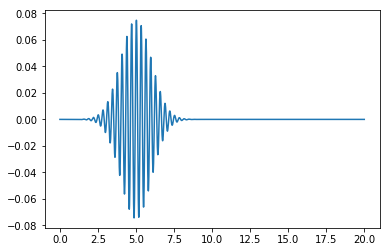

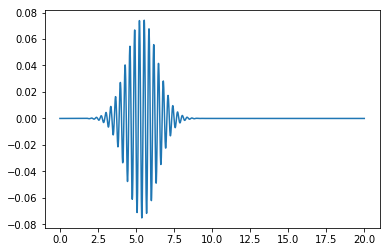

In [4]:
n = 200

V = np.zeros(Nx)
psi_R,psi_I = timeEvolve(psi_R_init,psi_I_init,n,V,dt)

plt.plot(x,psi_R_init)
plt.show()

plt.plot(x,psi_R)
plt.show()




In [5]:
def plot_barrier(x, psi_init, psi_final, V):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 8)
    
    ax1_2 = ax1_1.twinx()                           
    l1, = ax1.plot(x, V, color = "tab:red")
    l1_2, = ax1_2.plot(x, psi_init)                            
    
    ax2_2 = ax2_2.twinx()
    l2, = ax2.plot(x, V, color = "tab:red")                               
    l2_2 = ax2_2.plot(x, psi_final)                

[0. 0. 0. ... 0. 0. 0.]


NameError: name 'ax1_1' is not defined

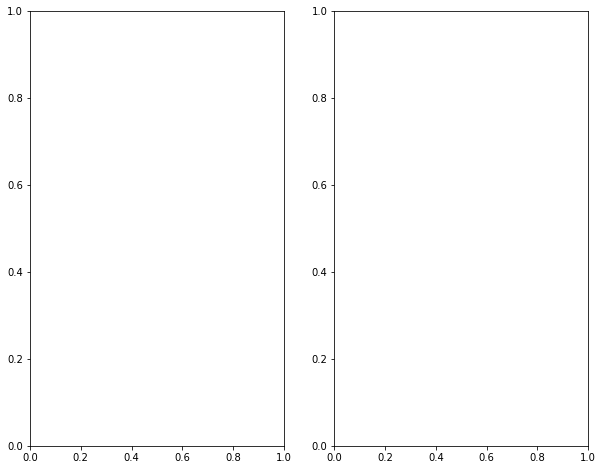

In [6]:
##Barrier, exercise 3
n = 100
l = L / 50
b = E / 2.0
Vb = np.zeros(Nx)
Vk = np.ones(int(l / L * Nx)) * b
Vb[int(Nx/2 - l * Nx / L /  2): int(Nx/2 + l * Nx / L /  2) ] = Vk
print(Vb)


psi_R_arr_b,psi_I_arr_b = timeEvolve(psi_R_init,psi_I_init,n,V,dt)
psi_R_b = psi_R_arr_b[n-1]
psi_I_b = psi_I_arr_b[n-1]

plot_barrier(x, psi_R_init, psi_R_b, V)